# 문서 간 유사도 구하기

여기서는 유클리디안 거리, 코사인 거리 (또는 유사도)에 대해 알아보겠습니다. 이 노트는 다음을 참조해서 만들었습니다.

- http://docs.likejazz.com/cosine-sim/



## 유클리디안 거리

우리가 흔히 알고 있는 거리는 **유클리디안 거리**라고 부릅니다. 

아래와 같은 데이터셋을 보겠습니다. `iris`라고 하는 데이터셋인데, 아이리스의 종류 별로 꽃잎 길이(Petal Length)나 꽃잎 폭(Petal Width) 따위를 측정한 데이터입니다. 이를 시각화해보면, 비슷한 종류의 아이리스끼리는 가까운 위치에 몰려있다는 것을 알 수 있습니다. 여기서 말하는 **가깝다**는 말은 유클리디안 거리를 측정한 경우입니다.

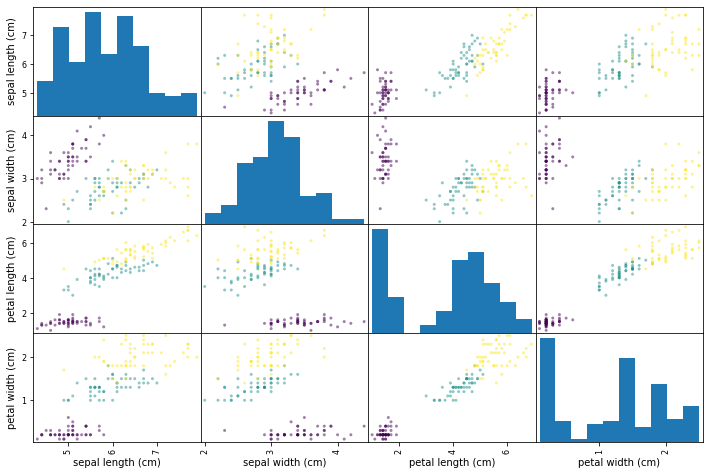

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(df, figsize=(12, 8), c=iris.target)
plt.show()

$p$, $q$가 각각 벡터라 할 때, 유클리디안 거리의 식은 아래와 같습니다.

$||p-q|| = \sqrt{(p_1-q_1)^2+(p_2-q_2)^2+...} = \sqrt{(p-q)·(p-q)}  = \sqrt{||p||^2+||q||^2-2p·q} $

In [2]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

같은 종류의 아이리스끼리 거리가 더 가까운 걸 볼 수 있습니다.

In [3]:
import numpy as np

i = 0
target_label = iris.target[i]
print('비교 샘플:', iris.target_names[target_label], '\n')

for j in range(1, 150, 10):
    dist = euclidean_distance(df.loc[i], df.loc[j])
    target_label = iris.target[j]
    print('{:>3} 번째 샘플({})까지의 거리: {}'.format(j, iris.target_names[target_label], round(dist, 2)))
    

비교 샘플: setosa 

  1 번째 샘플(setosa)까지의 거리: 0.54
 11 번째 샘플(setosa)까지의 거리: 0.37
 21 번째 샘플(setosa)까지의 거리: 0.3
 31 번째 샘플(setosa)까지의 거리: 0.39
 41 번째 샘플(setosa)까지의 거리: 1.35
 51 번째 샘플(versicolor)까지의 거리: 3.62
 61 번째 샘플(versicolor)까지의 거리: 3.23
 71 번째 샘플(versicolor)까지의 거리: 3.08
 81 번째 샘플(versicolor)까지의 거리: 2.7
 91 번째 샘플(versicolor)까지의 거리: 3.6
101 번째 샘플(virginica)까지의 거리: 4.21
111 번째 샘플(virginica)까지의 거리: 4.52
121 번째 샘플(virginica)까지의 거리: 4.03
131 번째 샘플(virginica)까지의 거리: 6.01
141 번째 샘플(virginica)까지의 거리: 4.64


## 코사인 유사도

이번에는 다른 예제로 위키피디아의 Machine Learning, Artifical Intelligence, Soccer, Tennis 페이지를 가져와보겠습니다.

### 위키피디아 예제

In [5]:
import requests 
from bs4 import BeautifulSoup

def wikipedia(query): # 크롤링
    url = "https://en.wikipedia.org/wiki/{}".format(query)
    r = requests.get(url)
    bs = BeautifulSoup(r.text, 'html.parser')
    return ''.join([p.text for p in bs.select(".mw-parser-output p")])

q1 = wikipedia("Machine Learning") # 각각의 문서가 담김
q2 = wikipedia("Artifical Intelligence")
q3 = wikipedia("Soccer")
q4 = wikipedia("Tennis")

# 위키피디아 문서 내용을 가져왔습니다.
q1[:100]

'Machine learning (ML) is the study of computer algorithms that improve automatically through experie'

In [6]:
q1

'Machine learning (ML) is the study of computer algorithms that improve automatically through experience.[1] It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop  conventional algorithms to perform the needed tasks.\nMachine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.[4][5] In its application across business problems, machine learning is also r

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [q1, q2, q3, q4]

# CountVectorizer는 디폴트로 문서를 소문자화 후, 띄어쓰기 기준으로 나눠줍니다.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents).toarray()
X

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  2,  0,  0],
       [ 2,  0,  1, ...,  0,  0,  1],
       [12,  1,  0, ...,  0,  1,  0]], dtype=int64)

Machine Learning과 다른 문서 간의 유클리디안 거리를 측정해보겠습니다. 머신러닝과 인공지능 간의 거리가 멀군요!

In [10]:
print("Machine Learning과의 거리\n")

for j, s in enumerate(["Machine Learning", "Artifical Intelligence", 
                       "Soccer", "Tennis"]):
    print(s.ljust(25), euclidean_distance(X[0], X[j])) #각 값의 거리 구하기

Machine Learning과의 거리

Machine Learning          0.0
Artifical Intelligence    729.9910958361068
Soccer                    438.8439358131772
Tennis                    740.364099615858


### 코사인 유사도란?

Machine Learning 문서는 Artifical Intelligence와 가장 먼 것으로 나옵니다. 이는 문서의 길이가 다르기 때문입니다. Artifical Intelligence는 문서의 길이가 깁니다. 반면 Machine Learning과 Soccer 문서에 포함된 단어 수는 비슷하기 때문에 둘 사이가 유사하게 나온 것입니다.

이는 우리가 원하는 결과가 아닙니다. 이런 경우에는 **코사인 거리**, 또는 **코사인 유사도**를 주로 사용합니다.

코사인 유사도는 두 벡터가 이루는 각도의 코사인 값입니다. 식은 다음과 같습니다.

$cos\theta = \frac{p · q}{||p||||q||}$

코사인 유사도는 [-1, 1]의 값을 가집니다. 1에 가까울수록 유사하다는 의미입니다. 이를 거리로 표현하고 싶다면 (1-코사인 유사도)를 계산하면 됩니다.

In [11]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("Machine Learning과의 거리\n")

for j, s in enumerate(["Machine Learning", "Artifical Intelligence", "Soccer", "Tennis"]):
    print(s.ljust(25), 1- cosine_similarity(X[0], X[j]))

Machine Learning과의 거리

Machine Learning          0.0
Artifical Intelligence    0.09159124320025103
Soccer                    0.1951496950506436
Tennis                    0.1804280333417536


문서에 단어가 많으면 벡터의 길이도 길어진다는 것이 문제였습니다. 코사인 거리는 벡터의 길이 1로 만든 후 유클리디안 거리를 사용한 것과 비슷한 결과를 산출합니다. (정규화를 위해 `np.linalg.norm` 함수를 사용했습니다.)

In [12]:
X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)

print("Machine Learning과의 거리\n")

for j, s in enumerate(["Machine Learning", "Artifical Intelligence", "Soccer", "Tennis"]):
    print(s.ljust(25), euclidean_distance(X_norm[0], X_norm[j]))

Machine Learning과의 거리

Machine Learning          0.0
Artifical Intelligence    0.4279982317726346
Soccer                    0.624739457775229
Tennis                    0.6007129653033195


### 사이킷런 이용하기

사이킷런에 유클리디안 거리와 코사인 거리를 구하는 함수가 구현되어 있습니다.

In [13]:
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(X, X, 'euclidean')
dists = pairwise_distances(X, X, 'cosine')

# OR

from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

dists = euclidean_distances(X, X)
dists = cosine_distances(X, X)